# **Standard Matrix Multiplication** Python Performance

In [ ]:
import random
from time import *

import psutil
import threading
from queue import Queue

import numpy as np
import matplotlib.pyplot as plt

import cProfile
import timeit
import pytest

In the next chunck, we define the maximum size of the matrices to be multiplied. It is a power of 2, so that the algorithm can be applied to $log_2(n)$ size of matrices.

In [ ]:
n=1024

The first step will be generating the matrices. For all executions we will use the same matrices $A$ and $B$, both of order $n$, but will vary the range of the different loops of the algorithm, so that we can measure the performance for all orders we want.

In [ ]:
A = [[random.random() for _ in range(n)] for _ in range(n)]
B = [[random.random() for _ in range(n)] for _ in range(n)]
C = [[0 for _ in range(n)] for _ in range(n)]

Now, we create the function 'measure_cpu_usage', which will be used to measure the usage of different cores of the CPU. This function will be executed in a thread, so we can measure the usage of the CPU while the algorithm is running, in time intervals of 1 second.

In [ ]:
def measure_cpu_usage(cpu_queue):
    """
    This function measures the cpu usage of the current process in
    different cores and puts the result in the cpu_queue
    :param cpu_queue: the queue to put the cpu usage in
    :return: None
    """
    while True:
        cpu_percent = np.array(psutil.cpu_percent(interval=1, percpu=True))
        cpu_queue.put(cpu_percent)

In [ ]:
cpu_queue = Queue()     # Queue to put the cpu usage in

In [ ]:
cpu_thread = threading.Thread(target=measure_cpu_usage, args=(cpu_queue,))
cpu_thread.daemon = True 
cpu_thread.start()

In the following chunck, we implement the matrix multiplication algorithm.

In [ ]:
def matrix_multiplication(A, B, n):
    for i in range(n):
        for j in range(n):
            sum = 0
            for k in range(n):
                sum += A[i][k] * B[k][j]

        C[i][j] = sum

    return C

In [ ]:
for i in range(12):
    matrix_multiplication(A, B, 2**i)

In [ ]:
def test(A, B, n):
    print('TEST')
    i = 1
    while i <= n:
        print("n = ", 2**i)
        matrix_multiplication(A, B, i)
        i = 2*i

Si ahora realizamos el benchmarking de la multiplicación de matrices, mediante el uso la librearía pytest-benchmark sobre el código de test.py, obtenemos los siguientes resultados para las cinco primeras potencias de dos (el resto han sido obtenidas directamente por consola)

In [28]:
!pytest -v test.py

============================= test session starts =============================
platform win32 -- Python 3.9.13, pytest-7.4.2, pluggy-1.3.0 -- C:\Users\carde\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe
cachedir: .pytest_cache
benchmark: 4.0.0 (defaults: timer=time.perf_counter disable_gc=False min_rounds=5 min_time=0.000005 max_time=1.0 calibration_precision=10 warmup=False warmup_iterations=100000)
rootdir: c:\Users\carde\Desktop\ULPGC\ciencia_e_ingenieria_de_datos\tercero\BigData\matrices\Python_Paper\matrix_multiplication_python_performance
plugins: anyio-3.6.2, benchmark-4.0.0
collecting ... collected 5 items

test.py::test_benchmark[2] PASSED                                        [ 20%]
test.py::test_benchmark[4] PASSED                                        [ 40%]
test.py::test_benchmark[8] PASSED                                        [ 60%]
test.py::test_benchmark[16] PASSED                                       [ 80%]
test.

## **Results**

In this section, we show the measures of time and CPU usage obtained for different orders of the matrices. 

### Execution **Time**

Here, we introduce the obtained results for the other languages.

In [24]:
x = [r'$2^0$', r'$2^1$', r'$2^2$', r'$2^3$', r'$2^4$', r'$2^5$', r'$2^6$', r'$2^7$', r'$2^8$', r'$2^9$', r'$2^{10}$', r'$2^{11}$']
t_python = [0, 0.0, 0.0, 0.0010111331939697266, 0.0014104843139648438, 0.0063686370849609375, 0.04304695129394531, 0.4458949565887451, 3.8345444202423096, 30.988054990768433, 283.0610454082489, 1200]
t_java = [0, 0, 0, 0, 0, 0, 0, 0.016, 0.047, 0.188, 2.061, 64.805]
t_c = [0.000155,0.000000,0.000001,0.000002,0.000016,0.000486,0.002825,0.008100,0.068164,0.471069,3.968524,45.999192]
t_rust = [0.01419,0.01399,0.01535,0.01536,0.014907,0.0167,0.021,0.08575,0.579,4.628,47.697,409.3796]
t_nodejs = [0, 0, 0, 0, 0, 0.002, 0.002, 0.002, 0.028, 0.268, 1.988, 54.346]

ALL LANGUAGES COMPARISON CHART:

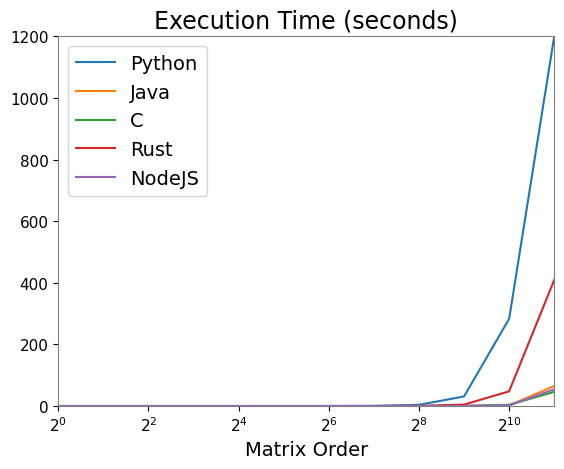

In [25]:
plt.plot(x, t_python)
plt.plot(x, t_java)
plt.plot(x, t_c)
plt.plot(x, t_rust)
plt.plot(x, t_nodejs)

plt.xticks(x[::2])
plt.tick_params(axis='both', which='major', labelsize=11)

plt.title('Execution Time (seconds)', fontsize=17)
plt.xlabel('Matrix Order', fontsize=14)

plt.legend(['Python', 'Java', 'C', 'Rust', 'NodeJS'], prop={'size': 14})

plt.margins(0)

plt.gca().spines['bottom'].set_color('0.5')
plt.gca().spines['top'].set_color('0.5')
plt.gca().spines['left'].set_color('0.5')
plt.gca().spines['right'].set_color('0.5')

plt.savefig('top-5.jpg')
plt.show()

TOP 3 LANGUAGES COMPARISON CHART:

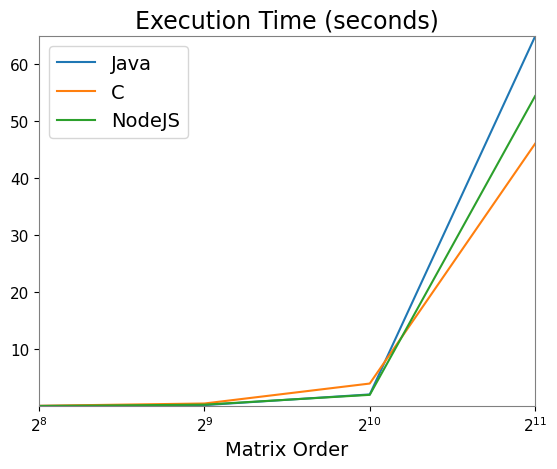

In [26]:
plt.plot(x[8:], t_java[8:])
plt.plot(x[8:], t_c[8:])
plt.plot(x[8:], t_nodejs[8:])

plt.tick_params(axis='both', which='major', labelsize=11)

plt.title('Execution Time (seconds)', fontsize=17)
plt.xlabel('Matrix Order', fontsize=14)

plt.legend(['Java', 'C', 'NodeJS'], prop={'size': 14})

plt.margins(0)

plt.gca().spines['bottom'].set_color('0.5')
plt.gca().spines['top'].set_color('0.5')
plt.gca().spines['left'].set_color('0.5')
plt.gca().spines['right'].set_color('0.5')

plt.savefig('top-3.jpg')
plt.show()

### **CPU** Usage

In [21]:
cpu_list = list(cpu_queue.queue)

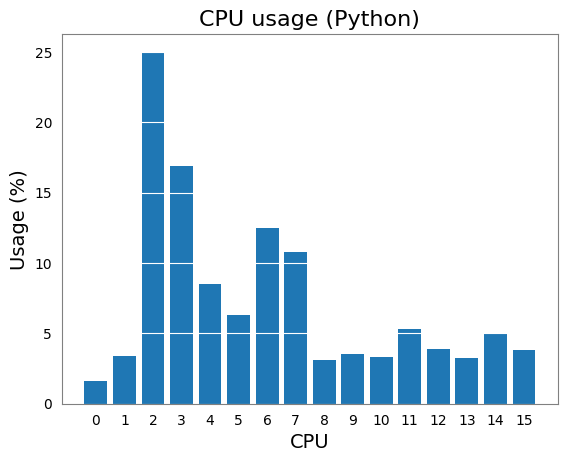

In [22]:
cpu_mean = np.mean(cpu_list, axis=0)
cpu_mean

import matplotlib.pyplot as plt
plt.bar(range(len(cpu_mean)), cpu_mean)

plt.xticks(range(len(cpu_mean)), range(len(cpu_mean)))
plt.tick_params(top=False, bottom=False, left=False, right=False)

plt.title('CPU usage (Python)', fontsize=16)
plt.xlabel('CPU', fontsize=14)
plt.ylabel('Usage (%)', fontsize=14)

for spine in plt.gca().spines.values():
    spine.set_color('0.5')

plt.grid(axis='y', color='1')

plt.savefig('cpu_usage.png')
plt.show()

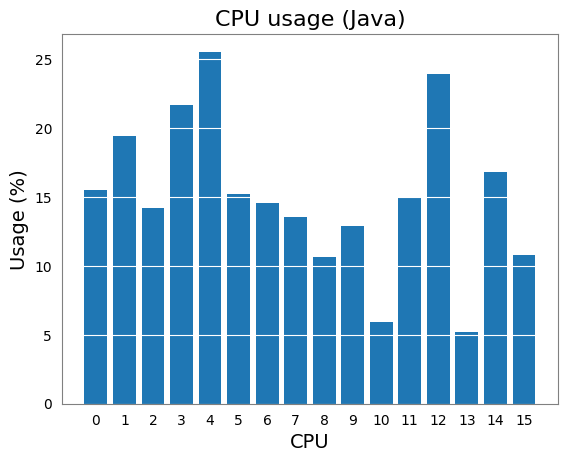

In [23]:
cpu_mean = [15.533093793791142, 19.46184627821745, 14.224461209275027, 21.64901170602905, 25.546293343314147, 15.197992412433262, 14.57920844345248, 13.56883258222577, 10.674215790473998, 12.928305346397432, 5.903352761861194, 14.940431438633095, 23.925703790279236, 5.181195320104931, 16.802639125518613, 10.82577067914602]

import matplotlib.pyplot as plt
plt.bar(range(len(cpu_mean)), cpu_mean)

plt.xticks(range(len(cpu_mean)), range(len(cpu_mean)))
plt.tick_params(top=False, bottom=False, left=False, right=False)

plt.title('CPU usage (Java)', fontsize=16)
plt.xlabel('CPU', fontsize=14)
plt.ylabel('Usage (%)', fontsize=14)

for spine in plt.gca().spines.values():
    spine.set_color('0.5')

plt.grid(axis='y', color='1')

plt.savefig('cpu_usage_java.png')
plt.show()